In [1]:
# Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
# Reading the input images and putting them into a numpy array
data=[]
labels=[]

height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width*channels

for i in range(classes) :
    path = "/Users/avi/Documents/UMKC/PythonDL/project/data/Train/{0}/".format(i)
    print(path)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")
            
data=np.array(data)
labels=np.array(labels)

#Randomize the order of the input images
s=np.arange(data.shape[0])
np.random.seed(43)
np.random.shuffle(s)
data=data[s]
labels=labels[s]

/Users/avi/Documents/UMKC/PythonDL/project/data/Train/0/
/Users/avi/Documents/UMKC/PythonDL/project/data/Train/1/
/Users/avi/Documents/UMKC/PythonDL/project/data/Train/2/
/Users/avi/Documents/UMKC/PythonDL/project/data/Train/3/
/Users/avi/Documents/UMKC/PythonDL/project/data/Train/4/
/Users/avi/Documents/UMKC/PythonDL/project/data/Train/5/
/Users/avi/Documents/UMKC/PythonDL/project/data/Train/6/
/Users/avi/Documents/UMKC/PythonDL/project/data/Train/7/
/Users/avi/Documents/UMKC/PythonDL/project/data/Train/8/
/Users/avi/Documents/UMKC/PythonDL/project/data/Train/9/
/Users/avi/Documents/UMKC/PythonDL/project/data/Train/10/
/Users/avi/Documents/UMKC/PythonDL/project/data/Train/11/
/Users/avi/Documents/UMKC/PythonDL/project/data/Train/12/
/Users/avi/Documents/UMKC/PythonDL/project/data/Train/13/
/Users/avi/Documents/UMKC/PythonDL/project/data/Train/14/
/Users/avi/Documents/UMKC/PythonDL/project/data/Train/15/
/Users/avi/Documents/UMKC/PythonDL/project/data/Train/16/
/Users/avi/Documents/UMK

In [3]:
#Spliting the images into train and validation sets
(X_train,X_val)=data[(int)(0.2*len(labels)):],data[:(int)(0.2*len(labels))]
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

#Using one hote encoding for the train and validation labels
from keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

In [4]:
#Definition of the DNN model

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [5]:
#using 20 epochs for the training and earlystopping
epochs = 20
monitor=EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',restore_best_weights=True)
history = model.fit(X_train, y_train, callbacks=[monitor], batch_size=32, epochs=epochs,
validation_data=(X_val, y_val))



Train on 31368 samples, validate on 7841 samples
Epoch 1/20
31368/31368 [==============================] - 113s 4ms/step - loss: 1.2378 - accuracy: 0.6529 - val_loss: 0.1474 - val_accuracy: 0.9631
Epoch 2/20
31368/31368 [==============================] - 128s 4ms/step - loss: 0.2403 - accuracy: 0.9276 - val_loss: 0.0784 - val_accuracy: 0.9786
Epoch 3/20
31368/31368 [==============================] - 119s 4ms/step - loss: 0.1475 - accuracy: 0.9543 - val_loss: 0.0521 - val_accuracy: 0.9897
Epoch 4/20
31368/31368 [==============================] - 115s 4ms/step - loss: 0.1046 - accuracy: 0.9677 - val_loss: 0.0382 - val_accuracy: 0.9906
Epoch 5/20
31368/31368 [==============================] - 103s 3ms/step - loss: 0.0894 - accuracy: 0.9729 - val_loss: 0.0276 - val_accuracy: 0.9941
Epoch 6/20
31368/31368 [==============================] - 102s 3ms/step - loss: 0.0780 - accuracy: 0.9757 - val_loss: 0.0306 - val_accuracy: 0.9936
Epoch 7/20
31368/31368 [==============================] - 152s

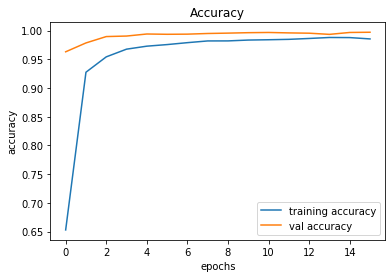

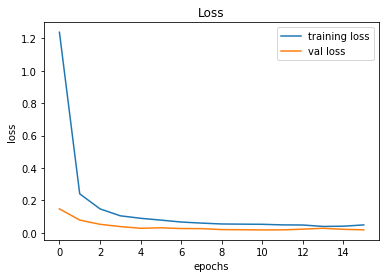

In [6]:
#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
#Predicting with the test data
y_test=pd.read_csv("/Users/avi/Documents/UMKC/PythonDL/project/data/Test.csv")
labels=y_test['Path'].to_numpy()
y_test=y_test['ClassId'].values

data=[]

for f in labels:
    image=cv2.imread('/Users/avi/Documents/UMKC/PythonDL/project/data/Test/'+f.replace('Test/', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255 
pred = model.predict_classes(X_test)

In [8]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9742676167854315

In [11]:
model.save('/Users/avi/Documents/UMKC/PythonDL/project/model.h5')